In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:0.4f}")
sns.set(style="whitegrid")

In [120]:
# Loading and show 1ST 5 Records the dataset
data = pd.read_csv("financial_fraud_detection_dataset.csv")

print("Shape:", data.shape)
data.head()

Shape: (5000000, 18)


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.7800,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.2100,3,0.2200,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.6500,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.1400,7,0.9600,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.8600,deposit,other,London,pos,False,NaN,NaN,-1.7800,20,0.8900,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.2200,deposit,online,Sydney,pos,False,NaN,NaN,-0.6000,6,0.3700,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.4300,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.7900,13,0.2700,ACH,108.161.108.255,D7637601


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

###### provides a concise summary of the dataset, including the total number of rows, column names, data types, and non-null counts.  This step helps verify data integrity, identify missing values, and ensure that each feature has the correct data type before preprocessing and modeling.

### Statistical Summary of Numerical Features
##### data.describe()` generates descriptive statistics for all numerical columns in the dataset.  It reports key metrics such as count, mean, standard deviation, minimum, and maximum values.  The quartile values (25%, 50%, 75%) help understand data distribution and spread.  This summary is useful for detecting skewness, scale differences, and potential outliers.  It provides an initial quantitative insight before feature engineering and modeling.

In [122]:
data.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5000000.0000,4103487.0000,5000000.0000,5000000.0000,5000000.0000
mean,358.9343,1.5258,-0.0004,10.5013,0.5000
std,469.9333,3576.5687,1.0008,5.7668,0.2886
min,0.0100,-8777.8142,-5.2600,1.0000,0.0000
25%,26.5700,-2562.3761,-0.6800,5.0000,0.2500
50%,138.6700,0.8443,0.0000,11.0000,0.5000
75%,503.8900,2568.3387,0.6700,16.0000,0.7500
max,3520.5700,8757.7585,5.0200,20.0000,1.0000


In [123]:
import os
from pathlib import Path

## Create Sample for EDA

#### Sampling Data for Efficient EDA
##### A fixed-size random sample is created to speed up exploratory data analysis while preserving the original data distribution.  This approach ensures safe, reproducible analysis without loading or visualizing the entire large dataset.

In [124]:
# Create a 200k sample for EDA (fast & safe)
import numpy as np

SAMPLE_SIZE = 400_000
np.random.seed(42)

# If dataset smaller, take full
if len(data) <= SAMPLE_SIZE:
    data_sample = data.copy()
else:
    data_sample = data.sample(n=SAMPLE_SIZE, random_state=42)

print("Sample shape:", data_sample.shape)
data_sample.head()

Sample shape: (400000, 18)


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
3577888,T3677888,2023-04-09T20:06:09.254118,ACC529887,ACC346873,11.6700,transfer,online,London,pos,False,NaN,-6143.8042,0.8700,11,0.8900,ACH,143.188.216.101,D1912159
4993932,T5093932,2023-07-16T05:26:15.162082,ACC872160,ACC767192,184.3100,payment,other,Tokyo,pos,False,NaN,-512.1619,-0.5400,10,0.6500,ACH,147.167.236.198,D5847071
4094900,T4194900,2023-12-13T19:04:47.539751,ACC403211,ACC536309,930.3400,deposit,travel,Toronto,pos,False,NaN,2156.2218,-0.6800,19,0.4000,ACH,83.44.197.232,D2907026
4420497,T4520497,2023-12-15T12:06:09.051479,ACC313245,ACC322871,0.0100,withdrawal,restaurant,Berlin,mobile,False,NaN,2166.3442,1.5800,14,0.9700,UPI,168.84.79.173,D7924413
634465,T734465,2023-11-19T21:33:24.238666,ACC570417,ACC246664,131.1600,withdrawal,restaurant,Dubai,mobile,False,NaN,-131.3436,-1.5400,20,0.7000,card,128.58.20.122,D5999152


## Check data types, missing values

In [125]:
# Show data types
print("Data Types:")
display(data_sample.dtypes)

Data Types:


transaction_id                  object
timestamp                       object
sender_account                  object
receiver_account                object
amount                         float64
transaction_type                object
merchant_category               object
location                        object
device_used                     object
is_fraud                          bool
fraud_type                      object
time_since_last_transaction    float64
spending_deviation_score       float64
velocity_score                   int64
geo_anomaly_score              float64
payment_channel                 object
ip_address                      object
device_hash                     object
dtype: object

##### This step displays the data type of each feature, helping verify correct type assignments and guiding appropriate preprocessing strategies.

In [126]:
# Missing values
missing = data.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(data)) * 100

print("\nMissing Values:")
display(pd.DataFrame({"missing": missing, "missing_pct": missing_pct.round(3)}).head(20))


Missing Values:


,missing,missing_pct
fraud_type,4820447,96.4090
time_since_last_transaction,896513,17.9300
timestamp,0,0.0000
transaction_id,0,0.0000
sender_account,0,0.0000
receiver_account,0,0.0000
merchant_category,0,0.0000
location,0,0.0000
amount,0,0.0000
transaction_type,0,0.0000


#### Missing Value Analysis
##### This code computes the count and percentage of missing values for each feature, sorted in descending order.  It helps identify columns requiring imputation, removal, or special handling before model training.

### Fraud distribution

Fraud counts:
is_fraud
False    385639
True      14361
Name: count, dtype: int64

Fraud percentage:
is_fraud
False   96.4098
True     3.5902
Name: proportion, dtype: float64


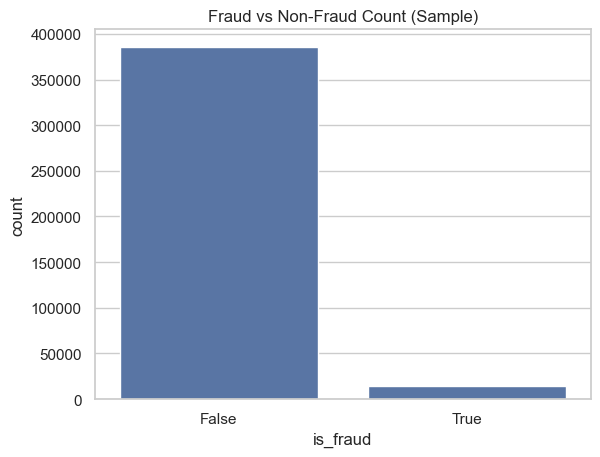

In [127]:
# Fraud distribution
fraud_col = "is_fraud"

print("Fraud counts:")
print(data_sample[fraud_col].value_counts())

print("\nFraud percentage:")
print(data_sample[fraud_col].value_counts(normalize=True) * 100)

# Barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_sample, x=fraud_col)
plt.title("Fraud vs Non-Fraud Count (Sample)")
plt.show()

##### Fraud Class Distribution Analysis
###### This step examines the distribution of fraudulent and non-fraudulent transactions to understand class imbalance.Both absolute counts and percentage shares are computed, followed by a bar plot for visual confirmation.Identifying imbalance early is crucial for choosing suitable evaluation metrics and modeling strategies.

## Inspect important categorical columns


Top values for transaction_type:


transaction_type
payment       100381
deposit       100153
withdrawal    100103
transfer       99363
Name: count, dtype: int64

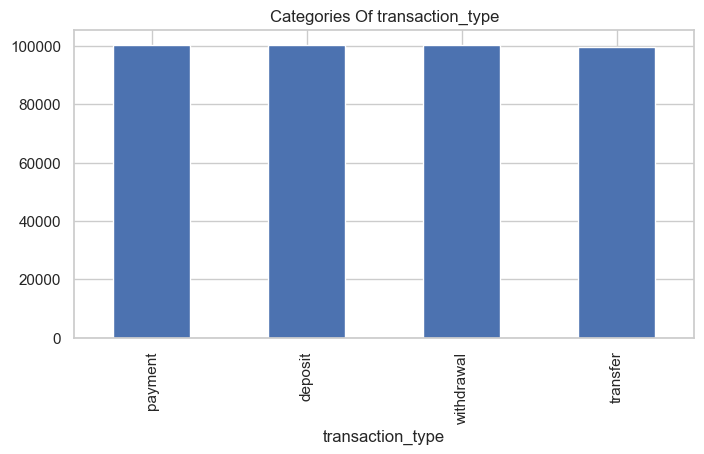


Top values for merchant_category:


merchant_category
travel           50354
entertainment    50222
restaurant       50096
other            49974
online           49923
retail           49910
utilities        49792
grocery          49729
Name: count, dtype: int64

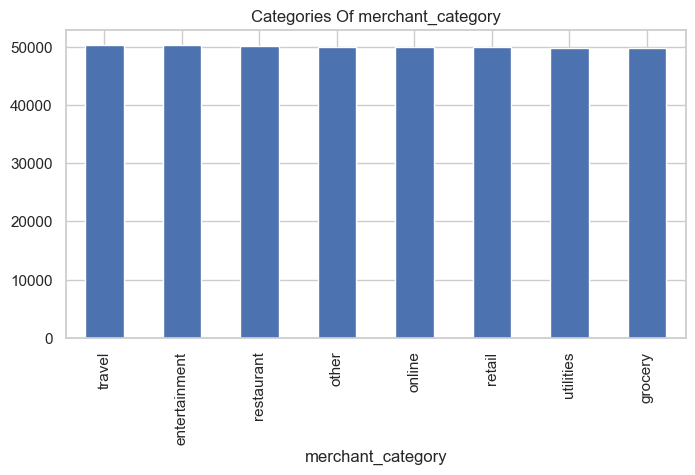


Top values for device_used:


device_used
atm       100281
pos        99963
mobile     99959
web        99797
Name: count, dtype: int64

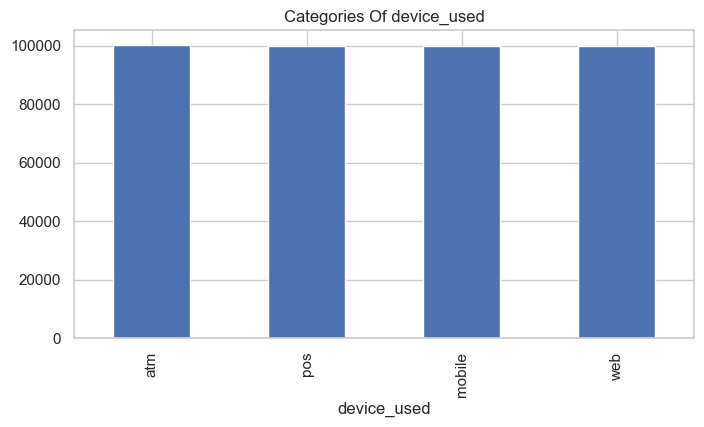


Top values for payment_channel:


payment_channel
card             100259
ACH              100140
wire_transfer     99902
UPI               99699
Name: count, dtype: int64

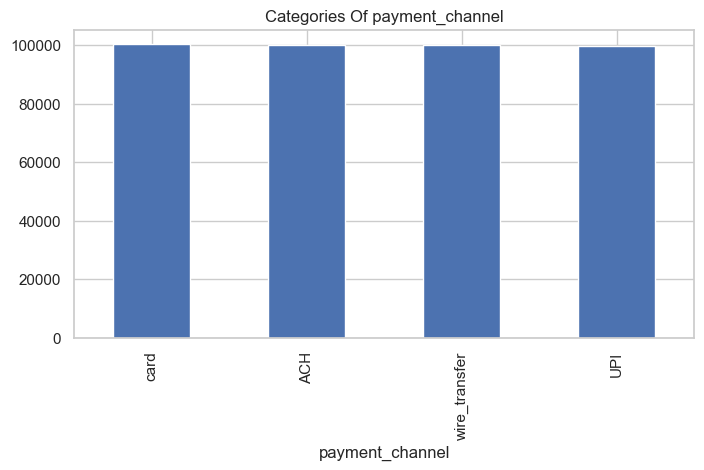


Top values for location:


location
Singapore    50429
Toronto      50109
Sydney       50095
Berlin       50001
Dubai        49914
Tokyo        49879
London       49802
New York     49771
Name: count, dtype: int64

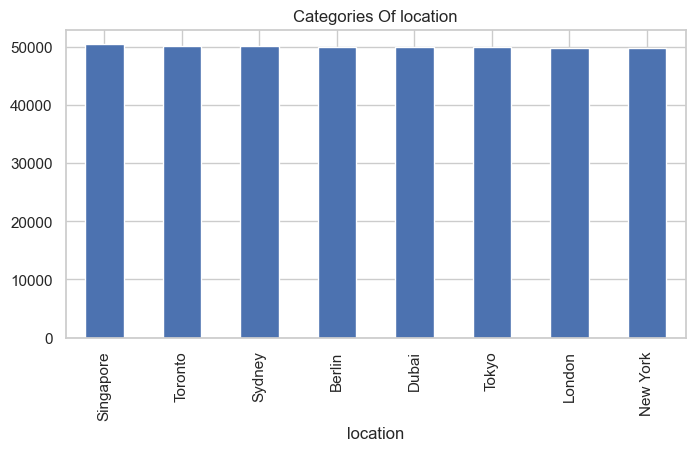

In [128]:
categorical_cols = [
    "transaction_type", "merchant_category",
    "device_used", "payment_channel", "location"
]

for col in categorical_cols:
    if col in data_sample.columns:
        print(f"\nTop values for {col}:")
        display(data_sample[col].value_counts().head(10))
        
        plt.figure(figsize=(8,4))
        data_sample[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Categories Of {col}")
        plt.show()
    else:
        print(f"{col} not found in dataset.")

##### Categorical Feature Distribution
###### This loop analyzes key categorical features by displaying their most frequent values.Top categories are visualized using bar charts to identify dominant patterns and rare categories.These insights guide encoding strategies and help assess potential feature importance.


## 5. Numeric column distributions

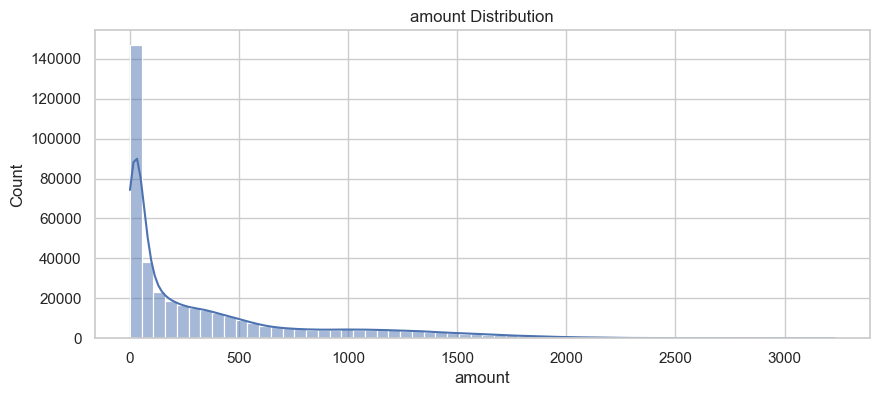

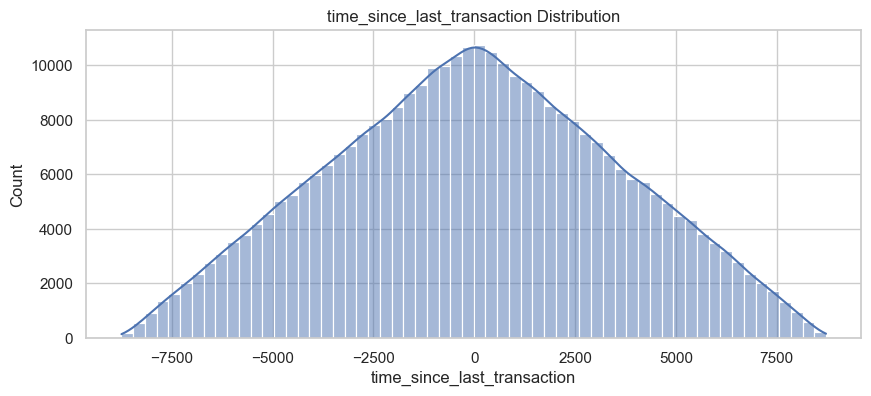

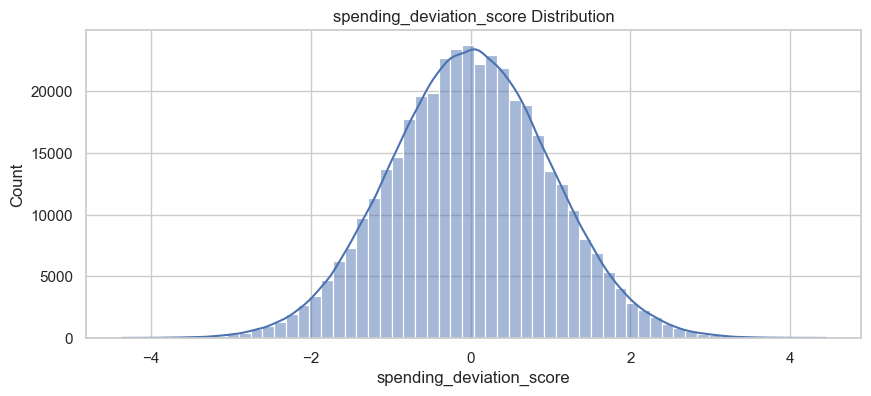

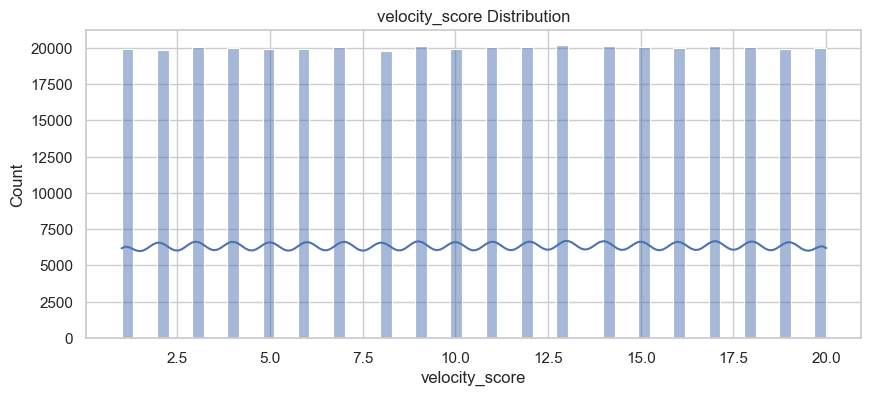

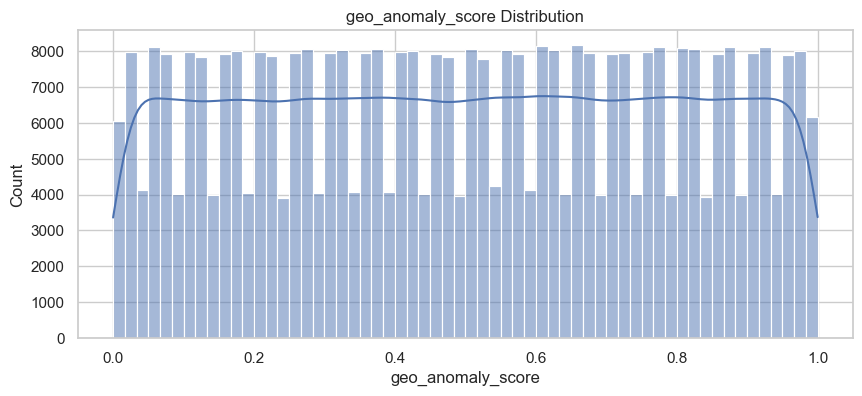

In [14]:
numeric_cols = [
    "amount", "time_since_last_transaction",
    "spending_deviation_score", "velocity_score",
    "geo_anomaly_score"
]

for col in numeric_cols:
    if col in data_sample.columns:
        plt.figure(figsize=(10,4))
        sns.histplot(data_sample[col], bins=60, kde=True)
        plt.title(f"{col} Distribution")
        plt.show()

##### Numerical Feature Distribution Analysis
###### This code visualizes the distribution of key numerical features using histograms with density curves.It helps identify skewness, heavy tails, and abnormal patterns commonly seen in fraud-related variables.These insights inform transformations, scaling, and outlier-handling decisions.


## 6. Fraud vs Non-Fraud boxplots (numeric features)

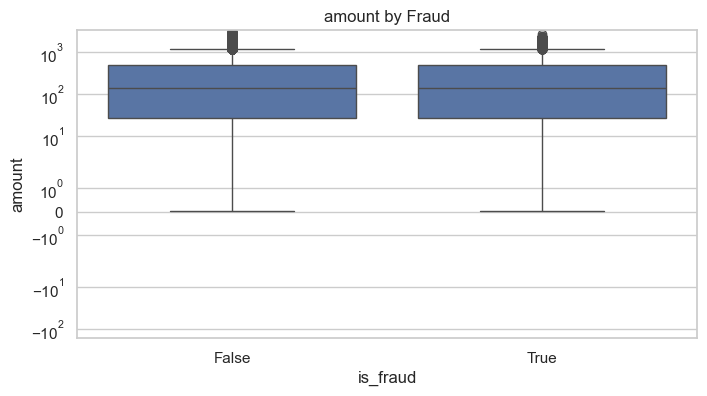

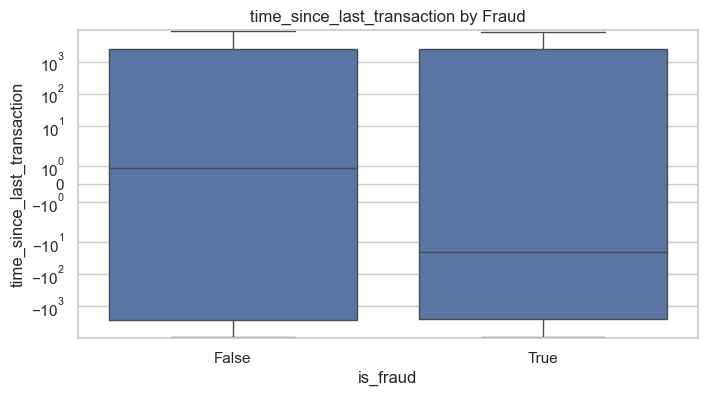

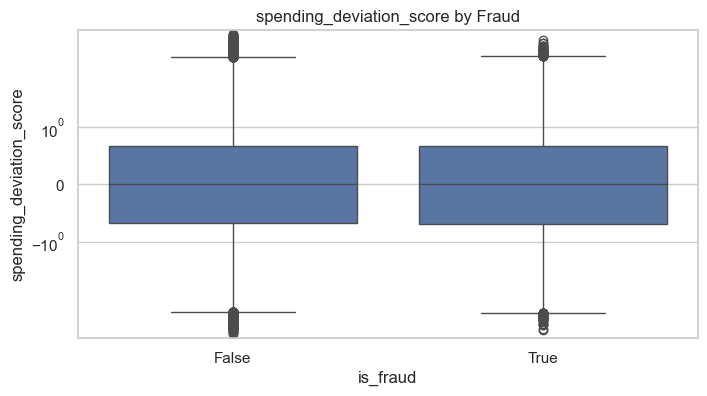

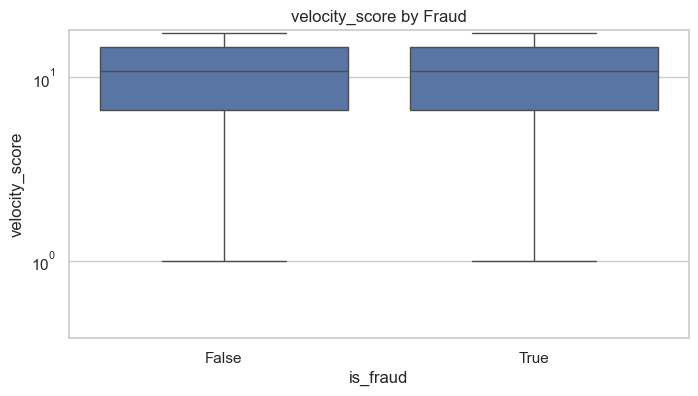

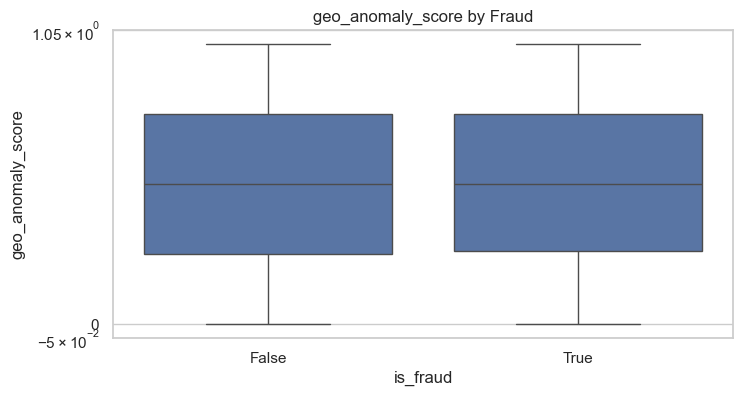

In [15]:
for col in numeric_cols:
    if col in data_sample.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=data_sample, x=fraud_col, y=col)
        plt.title(f"{col} by Fraud")
        plt.yscale("symlog")   # handles heavy tails nicely
        plt.show()

##### Numerical Features vs Fraud Comparison
###### Boxplots are used to compare the distribution of numerical features between fraudulent and non-fraudulent transactions.A symmetric log scale is applied to handle extreme values and heavy-tailed distributions.This analysis helps identify features that show strong separation between fraud and normal behavior.


## 7. Correlation heatmap (numeric features)

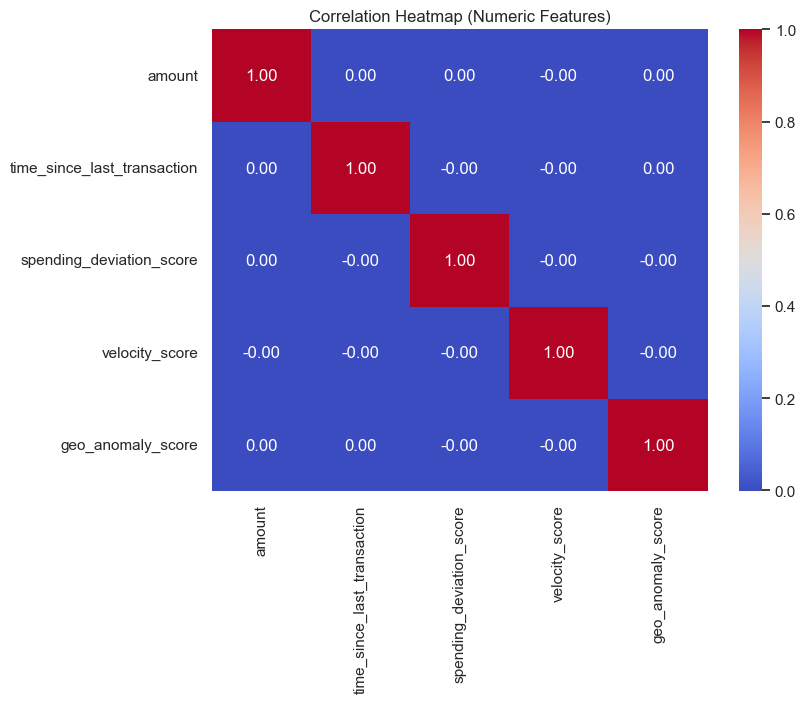

In [16]:
corr = data_sample[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

##### Correlation Analysis of Numerical Features
###### This step computes pairwise correlations among numerical features to assess linear relationships.The heatmap visually highlights strong positive or negative correlations that may indicate redundancy.Such insights help in feature selection and reducing multicollinearity before modeling.


## 8. Time-based analysis

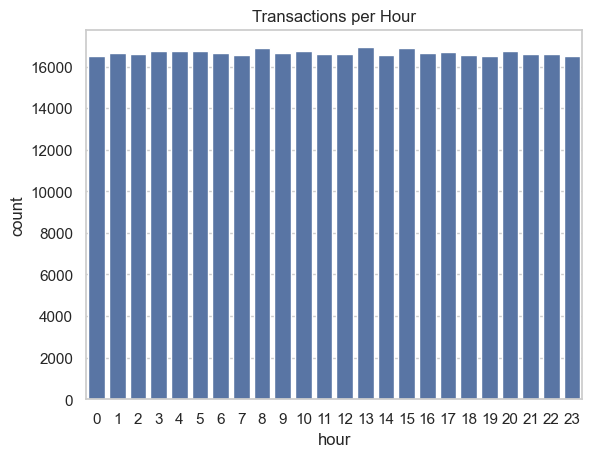

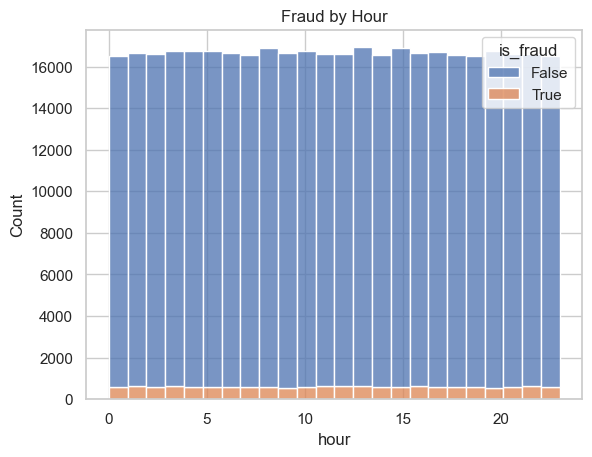

In [17]:
if "timestamp" in data_sample.columns:
    data_sample['timestamp'] = pd.to_datetime(data_sample['timestamp'], errors='coerce')
    data_sample['hour'] = data_sample['timestamp'].dt.hour
    data_sample['day'] = data_sample['timestamp'].dt.dayofweek

    sns.countplot(data=data_sample, x='hour')
    plt.title("Transactions per Hour")
    plt.show()

    sns.histplot(data=data_sample, x='hour', hue='is_fraud', multiple='stack', bins=24)
    plt.title("Fraud by Hour")
    plt.show()
else:
    print("timestamp column missing.")

##### Time-Based Transaction Pattern Analysis
###### The timestamp is converted to datetime format to extract hour and day-level features.Transaction volume and fraud occurrence are visualized across hours to detect temporal risk patterns.Time-based insights are valuable for capturing behavioral anomalies in fraud detection models.


## 9. Outlier detection (IQR method)

Amount outlier thresholds:
Lower: -689.7600000000001
Upper: 1220.64

Outlier %: 8.2225


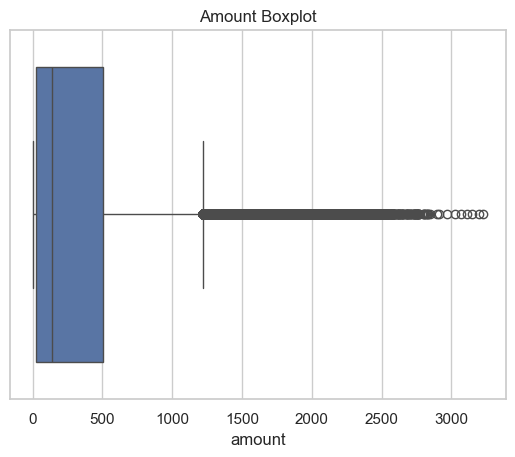

In [18]:
# Outlier detection for amount
if "amount" in data_sample.columns:

    Q1 = data_sample["amount"].quantile(0.25)
    Q3 = data_sample["amount"].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print("Amount outlier thresholds:")
    print("Lower:", lower_limit)
    print("Upper:", upper_limit)

    # flag outliers
    data_sample["amount_outlier"] = ((data_sample["amount"] < lower_limit) |
                                     (data_sample["amount"] > upper_limit)).astype(int)

    print("\nOutlier %:", data_sample["amount_outlier"].mean() * 100)

    sns.boxplot(x=data_sample["amount"])
    plt.title("Amount Boxplot")
    plt.show()

##### Outlier Detection Using IQR Method
###### The Interquartile Range (IQR) method is used to identify extreme transaction amounts.Thresholds are computed to flag unusually low or high values, which are common indicators of fraud.An outlier flag is created and visualized to quantify and inspect anomalous transaction behavior.

## 10. Save sample for reproducibility

In [19]:
data_sample.to_csv("eda_sample_200k.csv", index=False)
print("Saved sample → eda_sample_200k.csv")

Saved sample → eda_sample_200k.csv


# Data Preprocessing

In [20]:
import sys
!{sys.executable} -m pip install scikit-learn

In [21]:
import logging
import gc
## Library for Data Processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")
log = logging.getLogger("day3")

## Paths and quick checks

In [22]:
RAW_CSV = "financial_fraud_detection_dataset.csv"   # your full CSV
SAMPLE_CSV = "eda_sample_200k.csv"                 # sample created earlier
CLEAN_PARQUET = "data/financial_cleaned.parquet"   # output
# Create data dir if missing
Path("data").mkdir(parents=True, exist_ok=True)

# If the full CSV isn't loaded into `data` variable, load it (careful: large)
if 'data' not in globals():
    log.info("Loading full CSV into memory (this may be heavy).")
    data = pd.read_csv(RAW_CSV, low_memory=False)
    log.info(f"Full data loaded: shape={data.shape}")
else:
    log.info(f"Using pre-loaded DataFrame 'data' with shape {data.shape}")


2025-12-13 17:54:17,012 INFO Using pre-loaded DataFrame 'data' with shape (5000000, 18)


## Ensure sample exists (create from full data if necessary) (Code)

In [23]:
def ensure_sample(sample_path: str = SAMPLE_CSV, desired_n: int = 200_000, df_full: pd.DataFrame = None):
    """Ensure a sample CSV exists. If not, create from provided full df (or by chunking if full df absent)."""
    p = Path(sample_path)
    if p.exists():
        log.info(f"Found existing sample at {sample_path}")
        return pd.read_csv(sample_path)
    # If full df is available, sample directly
    if df_full is not None:
        n = min(desired_n, len(df_full))
        sample_df = df_full.sample(n=n, random_state=42).reset_index(drop=True)
        sample_df.to_csv(p, index=False)
        log.info(f"Created sample from full df at {sample_path} shape={sample_df.shape}")
        return sample_df
    # Fallback: create via chunked sampling (not implemented here since full df exists)
    raise FileNotFoundError("No sample or full DataFrame available to create sample.")

# create or load sample
sample_df = ensure_sample(SAMPLE_CSV, desired_n=200_000, df_full=data)


2025-12-13 17:54:17,021 INFO Found existing sample at eda_sample_200k.csv


## Compute IQR thresholds(Full Data)

In [24]:
# Numeric columns for outlier detection
numeric_cols = [
    col for col in [
        "amount",
        "time_since_last_transaction",
        "spending_deviation_score",
        "velocity_score",
        "geo_anomaly_score"
    ]
    if col in data.columns
]

iqr_thresholds = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # For numeric fraud features, negative values don't make sense → clip lower to 0
    if col in ["amount", "time_since_last_transaction", "spending_deviation_score", "velocity_score", "geo_anomaly_score"]:
        lower = max(lower, 0)

    iqr_thresholds[col] = {
        "q1": Q1,
        "q3": Q3,
        "iqr": IQR,
        "lower": lower,
        "upper": upper
    }

    print(f"\nColumn: {col}")
    print(f"  Q1   = {Q1}")
    print(f"  Q3   = {Q3}")
    print(f"  IQR  = {IQR}")
    print(f"  Lower threshold = {lower}")
    print(f"  Upper threshold = {upper}")


Column: amount
  Q1   = 26.57
  Q3   = 503.89
  IQR  = 477.32
  Lower threshold = 0
  Upper threshold = 1219.87

Column: time_since_last_transaction
  Q1   = -2562.376055962639
  Q3   = 2568.33867056625
  IQR  = 5130.7147265288895
  Lower threshold = 0
  Upper threshold = 10264.410760359584

Column: spending_deviation_score
  Q1   = -0.68
  Q3   = 0.67
  IQR  = 1.35
  Lower threshold = 0
  Upper threshold = 2.6950000000000003

Column: velocity_score
  Q1   = 5.0
  Q3   = 16.0
  IQR  = 11.0
  Lower threshold = 0
  Upper threshold = 32.5

Column: geo_anomaly_score
  Q1   = 0.25
  Q3   = 0.75
  IQR  = 0.5
  Lower threshold = 0
  Upper threshold = 1.5


##### Outlier Detection Using IQR Method
###### The Interquartile Range (IQR) method is used to identify extreme transaction amounts.Thresholds are computed to flag unusually low or high values, which are common indicators of fraud.An outlier flag is created and visualized to quantify and inspect anomalous transaction behavior.


## Impute time_since_last_transaction

In [25]:
from sklearn.impute import SimpleImputer

if "time_since_last_transaction" in data.columns:
    imputer = SimpleImputer(strategy="mean")
    # fit on full column or on sample? both fine; use full column if present to get realistic mean
    mean_source = data[["time_since_last_transaction"]]
    data["time_since_last_transaction"] = imputer.fit_transform(mean_source).ravel()
    log.info("Imputed missing values in 'time_since_last_transaction' using mean.")
else:
    log.warning("'time_since_last_transaction' not found in data.")
print("Missing Number's: ",data['time_since_last_transaction'].isnull().sum())

2025-12-13 17:54:21,537 INFO Imputed missing values in 'time_since_last_transaction' using mean.


Missing Number's:  0


##### Mean Imputation for Time-Based Feature
###### Missing values in `time_since_last_transaction` are handled using mean imputation to preserve overall distribution.Imputation is fitted on the full dataset to obtain a realistic global mean.This ensures the feature remains usable for modeling without introducing data leakage.


## Drop fraud_type (96% missing)

In [26]:
data.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.7800,withdrawal,utilities,Tokyo,mobile,False,NaN,1.5258,-0.2100,3,0.2200,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.6500,withdrawal,online,Toronto,atm,False,NaN,1.5258,-0.1400,7,0.9600,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.8600,deposit,other,London,pos,False,NaN,1.5258,-1.7800,20,0.8900,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.2200,deposit,online,Sydney,pos,False,NaN,1.5258,-0.6000,6,0.3700,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.4300,transfer,utilities,Toronto,mobile,False,NaN,1.5258,0.7900,13,0.2700,ACH,108.161.108.255,D7637601


In [27]:
missing_pct = data['fraud_type'].isna().mean() * 100
print(f"'fraud_type' missing percent = {missing_pct:.2f}%")

if missing_pct > 80:   # threshold: if >80% missing we drop
    data = data.drop(columns=['fraud_type'])
    print("Dropped column 'fraud_type' due to high missingness.")
else:
    print("'fraud_type' kept (missing% <= 80%).")


'fraud_type' missing percent = 96.41%
Dropped column 'fraud_type' due to high missingness.


##### High-Missingness Feature Handling
###### The percentage of missing values in `fraud_type` is calculated to assess its usability.Columns with excessive missingness (above 80%) are dropped to avoid noise and unreliable learning.This step helps maintain model robustness and reduces unnecessary feature complexity.

## Apply outlier flags to full dataset (do NOT drop rows)

In [28]:
# Apply flags using computed iqr_thresholds (from sample)
for col, thr in iqr_thresholds.items():
    if col in data.columns:
        flag_col = f"{col}_outlier_iqr"
        data[flag_col] = (
            (pd.to_numeric(data[col], errors='coerce') < thr["lower"]) |
            (pd.to_numeric(data[col], errors='coerce') > thr["upper"])
        ).astype("int8")

        print(f"{flag_col} (sample thresholds applied to full data).")
    else:
        print(f"{col} not present in full data; skipping outlier flag.")


amount_outlier_iqr (sample thresholds applied to full data).
time_since_last_transaction_outlier_iqr (sample thresholds applied to full data).
spending_deviation_score_outlier_iqr (sample thresholds applied to full data).
velocity_score_outlier_iqr (sample thresholds applied to full data).
geo_anomaly_score_outlier_iqr (sample thresholds applied to full data).


##### IQR-Based Outlier Flagging (Full Dataset)
###### Precomputed IQR thresholds from the EDA sample are applied to the full dataset to flag extreme values consistently.Binary outlier indicators are created for each numeric feature without removing records.This approach preserves data volume while allowing models to learn anomaly signals explicitly.


##  check for missing values (categorical & numeric)

In [29]:
# Missing values
missing = data.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(data)) * 100

print("\nMissing Values:")
display(pd.DataFrame({"missing": missing, "missing_pct": missing_pct.round(3)}).head(20))


Missing Values:


,missing,missing_pct
transaction_id,0,0.0000
timestamp,0,0.0000
sender_account,0,0.0000
receiver_account,0,0.0000
amount,0,0.0000
transaction_type,0,0.0000
merchant_category,0,0.0000
location,0,0.0000
device_used,0,0.0000
is_fraud,0,0.0000


## Dtype optimization and final small feature creation

In [30]:
# === Minimal dtype optimization & time-feature creation ===
import pandas as pd
import numpy as np

# 1) Ensure target is int8 (0/1)
if "is_fraud" in data.columns:
    data["is_fraud"] = pd.to_numeric(data["is_fraud"], errors="coerce").fillna(0).astype("int8")
    print("[OK] 'is_fraud' -> int8")

# 2) Parse timestamp (if present) and create hour/dayofweek features if missing
if "timestamp" in data.columns:
    # parse once (safe)
    if not pd.api.types.is_datetime64_any_dtype(data["timestamp"]):
        data["timestamp"] = pd.to_datetime(data["timestamp"], errors="coerce")
        print("[OK] 'timestamp' parsed to datetime")
    # create hour/dayofweek only if not already present
    if "hour" not in data.columns:
        data["hour"] = data["timestamp"].dt.hour.fillna(0).astype("int8")
        print("[OK] 'hour' created from timestamp -> int8")
    if "dayofweek" not in data.columns:
        data["dayofweek"] = data["timestamp"].dt.dayofweek.fillna(0).astype("int8")
        print("[OK] 'dayofweek' created from timestamp -> int8")
else:
    print("[WARN] 'timestamp' column not found — skipping time features")

# 3) Ensure hour/dayofweek (if present) are int8 (defensive)
for c in ("hour", "dayofweek"):
    if c in data.columns and not pd.api.types.is_integer_dtype(data[c]):
        data[c] = pd.to_numeric(data[c], errors="coerce").fillna(0).astype("int8")
        print(f"[OK] '{c}' coerced -> int8")

# 4) Downcast float64 -> float32 to reduce memory
float64_cols = [c for c in data.select_dtypes(include=["float64"]).columns]
if float64_cols:
    for c in float64_cols:
        data[c] = pd.to_numeric(data[c], downcast="float")
    print(f"[OK] Downcasted {len(float64_cols)} float64 cols -> float32")
else:
    print("[OK] No float64 columns to downcast")

# 5) Quick memory summary
mem_mb = data.memory_usage(deep=True).sum() / 1024**2
print(f"[MEM] Current dataframe memory usage: {mem_mb:.1f} MB")


[OK] 'is_fraud' -> int8
[OK] 'timestamp' parsed to datetime
[OK] 'hour' created from timestamp -> int8
[OK] 'dayofweek' created from timestamp -> int8
[OK] Downcasted 4 float64 cols -> float32
[MEM] Current dataframe memory usage: 2903.2 MB


##### Minimal Data Type Optimization & Time Feature Engineering
###### This step optimizes memory usage by enforcing compact data types, safely parsing timestamps, and creating time-based features (hour and day of week) while avoiding duplicates, ensuring the dataset remains efficient and consistent for large-scale fraud detection modeling.

## Validation checks

In [31]:
# Basic validations
print("Shape:", data.shape)
# Show outlier-flag fractions
flag_cols = [c for c in data.columns if c.endswith("_outlier_iqr")]
for c in flag_cols:
    print(f"{c}: {data[c].mean()*100:.4f}%")

# Show fraud rate
if "is_fraud" in data.columns:
    print("\nFraud distribution:")
    print(data["is_fraud"].value_counts(normalize=True) * 100)


Shape: (5000000, 24)
amount_outlier_iqr: 8.2490%
time_since_last_transaction_outlier_iqr: 41.0266%
spending_deviation_score_outlier_iqr: 50.1575%
velocity_score_outlier_iqr: 0.0000%
geo_anomaly_score_outlier_iqr: 0.0000%

Fraud distribution:
is_fraud
0   96.4089
1    3.5911
Name: proportion, dtype: float64


##### Basic Data Validation & Sanity Checks
###### This step verifies dataset shape, reports the proportion of IQR-based outlier flags, and summarizes the overall fraud rate to ensure preprocessing steps behaved as expected before model training

## Save cleaned dataset

In [32]:
!pip install pyarrow
# Save cleaned dataset as Parquet for Day 4
Path("data").mkdir(exist_ok=True)
out_path = Path(CLEAN_PARQUET)

print(f"Writing cleaned data to {out_path} (this may take time)...")

data.to_parquet(out_path, index=False, compression="snappy")

print("Write complete. Cleaned data is ready for feature engineering.")

Writing cleaned data to data\financial_cleaned.parquet (this may take time)...
Write complete. Cleaned data is ready for feature engineering.


# Feature Engineering

In [56]:
clean_path = Path("data/financial_cleaned.parquet")

df = pd.read_parquet(clean_path)
print("Loaded cleaned data:", df.shape)
df.head()

Loaded cleaned data: (5000000, 24)


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,...,payment_channel,ip_address,device_hash,amount_outlier_iqr,time_since_last_transaction_outlier_iqr,spending_deviation_score_outlier_iqr,velocity_score_outlier_iqr,geo_anomaly_score_outlier_iqr,hour,dayofweek
0,T100000,2023-08-22 09:22:43.516168,ACC877572,ACC388389,343.779999,withdrawal,utilities,Tokyo,mobile,0,...,card,13.101.214.112,D8536477,0,0,1,0,0,9,1
1,T100001,2023-08-04 01:58:02.606711,ACC895667,ACC944962,419.649994,withdrawal,online,Toronto,atm,0,...,ACH,172.52.47.194,D2622631,0,0,1,0,0,1,4
2,T100002,2023-05-12 11:39:33.742963,ACC733052,ACC377370,2773.860107,deposit,other,London,pos,0,...,card,185.98.35.23,D4823498,1,0,1,0,0,11,4
3,T100003,2023-10-10 06:04:43.195112,ACC996865,ACC344098,1666.219971,deposit,online,Sydney,pos,0,...,wire_transfer,107.136.36.87,D9961380,1,0,1,0,0,6,1
4,T100004,2023-09-24 08:09:02.700162,ACC584714,ACC497887,24.430000,transfer,utilities,Toronto,mobile,0,...,ACH,108.161.108.255,D7637601,0,0,0,0,0,8,6


### Time Features (Hour, Day of Week, Day)

In [57]:
# Make sure timestamp is datetime and create basic time features

if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    
    # Sort by sender + time (important for gap features)
    df = df.sort_values(["sender_account", "timestamp"])
    
    # Hour of day (0–23)
    if "hour" not in df.columns:
        df["hour"] = df["timestamp"].dt.hour
    
    # Day of week (0=Mon … 6=Sun)
    if "day_of_week" not in df.columns:
        df["day_of_week"] = df["timestamp"].dt.dayofweek
    
    # Date part only (for per-day counts)
    if "day" not in df.columns:
        df["day"] = df["timestamp"].dt.date

print(df[["timestamp", "hour", "day_of_week"]].head())

                        timestamp  hour  day_of_week
29376  2023-07-21 18:42:27.185407    18          4.0
552778 2023-09-05 01:29:31.912064     1          1.0
891203 2023-12-27 21:20:18.603045    21          2.0
483974 2023-05-17 13:27:04.779612    13          2.0
531422 2023-08-22 08:37:49.428281     8          1.0


##### Time Feature Preparation & Sorting
###### This step ensures timestamps are correctly parsed, sorts transactions chronologically per sender, and derives core time features (hour, day of week, and date) required for gap-based and behavioral fraud feature engineering.

### Amount & Ratio Features

In [60]:
# Amount-related features

# 1) Amount per velocity
if "velocity_score" in df.columns:
    df["amount_per_velocity"] = df["amount"] / (df["velocity_score"] + 1)
else:
    df["amount_per_velocity"] = np.nan

# 2) Log of amount (handles skewed money distribution)
df["amount_log"] = np.log1p(df["amount"])

# 3) Sender-level average and std of amount
# Ensure correct order
df = df.sort_values(["sender_account", "timestamp"])

# Past-only cumulative count
df["sender_past_txn_count"] = df.groupby("sender_account").cumcount()

# Past-only cumulative sum
df["sender_past_amount_sum"] = (
    df.groupby("sender_account")["amount"]
      .shift()
      .fillna(0)
      .groupby(df["sender_account"])
      .cumsum()
)

# Past-only average amount
df["sender_past_avg_amount"] = (
    df["sender_past_amount_sum"] /
    df["sender_past_txn_count"].replace(0, np.nan)
).fillna(0)

# Ratio feature (safe)
df["amount_to_sender_past_avg_ratio"] = (
    df["amount"] / df["sender_past_avg_amount"].replace(0, np.nan)
).fillna(0)


df[["amount", "amount_log", "sender_past_txn_count","sender_past_avg_amount", "amount_to_sender_past_avg_ratio"]].head()


,amount,amount_log,sender_past_txn_count,sender_past_avg_amount,amount_to_sender_past_avg_ratio
29376,38.259998,3.670206,0,0.000000,0.000000
552778,98.480003,4.599957,0,0.000000,0.000000
891203,280.420013,5.639848,1,98.480003,2.847482
483974,26.940001,3.330059,0,0.000000,0.000000
531422,60.520000,4.119362,1,26.940001,2.246474


##### Amount-Based Feature Engineering (Leakage-Safe)
###### This block creates scale-normalized and behavioral amount features, including log-transformed amounts and past-only sender statistics, ensuring all aggregates are causal and free from future data leakage for realistic fraud detection modeling.


### Frequency & Time-Gap Features

In [61]:
# Frequency and time-gap features (LEAKAGE-SAFE)

# 1) Past-only number of transactions per sender per day
if "day" in df.columns:
    df["sender_past_txn_same_day"] = (
        df.groupby(["sender_account", "day"])
          .cumcount()
    )
else:
    df["sender_past_txn_same_day"] = (
        df.groupby("sender_account")
          .cumcount()
    )

# 2) Time gap between consecutive transactions (in seconds) — SAFE
if "timestamp" in df.columns:
    df["transaction_gap_seconds"] = (
        df.groupby("sender_account")["timestamp"]
        .diff()
        .dt.total_seconds()
        .fillna(0)
    )
else:
    df["transaction_gap_seconds"] = 0

df[["sender_account","day","sender_past_txn_same_day","transaction_gap_seconds"]].head(10)

,sender_account,day,sender_past_txn_same_day,transaction_gap_seconds
29376,ACC100000,2023-07-21,0.0,0.000000e+00
552778,ACC100001,2023-09-05,0.0,0.000000e+00
891203,ACC100001,2023-12-27,0.0,9.834647e+06
483974,ACC100002,2023-05-17,0.0,0.000000e+00
531422,ACC100002,2023-08-22,0.0,8.363445e+06
4962367,ACC100002,2023-09-30,0.0,3.395282e+06
1070676,ACC100003,2023-04-13,0.0,0.000000e+00
903981,ACC100003,2023-04-30,0.0,1.430131e+06
3203332,ACC100003,2023-05-21,0.0,1.803857e+06
1049234,ACC100003,2023-08-25,0.0,8.353042e+06


##### Frequency & Time-Gap Feature Engineering (Leakage-Safe)
###### This step derives past-only transaction frequency and inter-transaction time-gap features per sender, capturing behavioral intensity and burst patterns while strictly avoiding any use of future information.


### Simple Risk Flags

In [62]:
# Ensure hour and day_of_week exist (use -1 for missing to avoid colliding with real values)
if "hour" not in df.columns:
    df["hour"] = pd.to_datetime(df["timestamp"], errors="coerce").dt.hour.fillna(-1).astype("int8")
else:
    df["hour"] = df["hour"].fillna(-1).astype("int8")

if "day_of_week" not in df.columns:
    df["day_of_week"] = pd.to_datetime(df["timestamp"], errors="coerce").dt.dayofweek.fillna(-1).astype("int8")
else:
    df["day_of_week"] = df["day_of_week"].fillna(-1).astype("int8")

# 1) Night transactions: 18:00–23:59 (inclusive). Treat -1 as not-night.
df["is_night_transaction"] = ((df["hour"] >= 18) & (df["hour"] <= 23)).astype("int8")

# 2) Weekend flag (assuming 0=Mon ... 6=Sun). Treat -1 as not-weekend.
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype("int8")

# 3) Self-transfer: sender and receiver are the same account (safe string compare)
df["is_self_transfer"] = (
    df["sender_account"].fillna("").astype(str) == df["receiver_account"].fillna("").astype(str)
).astype("int8")

display(df[["hour", "day_of_week", "is_night_transaction", "is_weekend", "is_self_transfer"]].head())


,hour,day_of_week,is_night_transaction,is_weekend,is_self_transfer
29376,18,4,1,0,0
552778,1,1,0,0,0
891203,21,2,1,0,0
483974,13,2,0,0,0
531422,8,1,0,0,0


##### Temporal & Behavioral Flag Features
###### This block standardizes time features, handles missing values safely, and creates intuitive binary indicators for night activity, weekend behavior, and self-transfers, which are strong behavioral signals in real-world fraud detection.


### Network Features (Account Connectivity)

In [63]:
# Network-style features: how connected each account is
# Past-only transaction counts
df["sender_past_txn_count"] = df.groupby("sender_account").cumcount()
df["receiver_past_txn_count"] = df.groupby("receiver_account").cumcount()

df[["sender_account", "receiver_account","sender_past_txn_count",
    "receiver_past_txn_count"]].head()

,sender_account,receiver_account,sender_past_txn_count,receiver_past_txn_count
29376,ACC100000,ACC140110,0,0
552778,ACC100001,ACC176449,0,0
891203,ACC100001,ACC732047,1,0
483974,ACC100002,ACC661173,0,0
531422,ACC100002,ACC518029,1,0


##### Network-Style Connectivity Features
###### This step creates past-only transaction count features for both senders and receivers, approximating account connectivity and activity levels while ensuring all network signals are strictly causal and leakage-free.


### Fraud History (Past-Only, Less Leakage) + Deviation Features

In [65]:
# Fraud history features (very important in fraud detection)
# Ensure correct order
df = df.sort_values(["sender_account", "timestamp"])

# Past-only fraud count (sender)
df["sender_past_fraud_count"] = (
    df.groupby("sender_account")["is_fraud"]
      .shift()
      .fillna(0)
      .groupby(df["sender_account"])
      .cumsum()
)

# Past-only fraud rate (sender)
df["sender_past_fraud_rate"] = (
    df["sender_past_fraud_count"] /
    df["sender_past_txn_count"].replace(0, np.nan)
).fillna(0)

# Same for receiver
df["receiver_past_fraud_count"] = (
    df.groupby("receiver_account")["is_fraud"]
      .shift()
      .fillna(0)
      .groupby(df["receiver_account"])
      .cumsum()
)

df["receiver_past_fraud_rate"] = (
    df["receiver_past_fraud_count"] /
    df["receiver_past_txn_count"].replace(0, np.nan)
).fillna(0)

# 3) Deviation-based feature
if "spending_deviation_score" in df.columns:
    df["deviation_squared"] = df["spending_deviation_score"] ** 2
else:
    df["deviation_squared"] = np.nan

df[[
    "sender_past_fraud_count",
    "sender_past_fraud_rate",
    "receiver_past_fraud_count",
    "receiver_past_fraud_rate",
    "deviation_squared"
]].head(10)

,sender_past_fraud_count,sender_past_fraud_rate,receiver_past_fraud_count,receiver_past_fraud_rate,deviation_squared
29376,0.0,0.0,0.0,0.0,0.0256
552778,0.0,0.0,0.0,0.0,0.0400
891203,0.0,0.0,0.0,0.0,0.0256
483974,0.0,0.0,0.0,0.0,3.1329
531422,0.0,0.0,0.0,0.0,0.4356
4962367,0.0,0.0,0.0,0.0,0.4356
1070676,0.0,0.0,0.0,0.0,0.0144
903981,0.0,0.0,0.0,0.0,0.7921
3203332,0.0,0.0,0.0,0.0,0.0676
1049234,0.0,0.0,0.0,0.0,0.1369


##### Historical Fraud Behavior Features (Leakage-Safe)
###### This block constructs past-only fraud counts and rates for both senders and receivers, capturing historical risk patterns while strictly preventing future information leakage, and augments them with a deviation-based risk amplification feature.


In [66]:
float_cols = df.select_dtypes(include=["float64"]).columns

if len(float_cols) > 0:
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast="float")
    print(f"Downcasted {len(float_cols)} float64 columns to float32.")
else:
    print("No float64 columns to downcast.")

df.info()

Downcasted 9 float64 columns to float32.
<class 'pandas.core.frame.DataFrame'>
Index: 5000000 entries, 29376 to 4102181
Data columns (total 43 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   transaction_id                           object        
 1   timestamp                                datetime64[ns]
 2   sender_account                           object        
 3   receiver_account                         object        
 4   amount                                   float32       
 5   transaction_type                         object        
 6   merchant_category                        object        
 7   location                                 object        
 8   device_used                              object        
 9   is_fraud                                 int8          
 10  time_since_last_transaction              float32       
 11  spending_deviation_score                 float32 

In [67]:
# Save final Day-4 feature dataset

features_path = Path("data/financial_features_day4.parquet")
features_path.parent.mkdir(parents=True, exist_ok=True)

df.to_parquet(features_path, index=False)
print("Saved Day-4 feature dataset to:", features_path)
print("Final shape:", df.shape)


Saved Day-4 feature dataset to: data\financial_features_day4.parquet
Final shape: (5000000, 43)


In [68]:
from pathlib import Path

# ===== EDIT THIS ONLY =====
PROJECT_DIR = Path("C:/Users/kadam")   # folder that contains /data
# =========================

DATA_PATH = PROJECT_DIR / "data" / "financial_features_day4.parquet"
MODELS_DIR = PROJECT_DIR / "models_day5"
REPORT_DIR = PROJECT_DIR / "reports_day5"

MODELS_DIR.mkdir(exist_ok=True)
REPORT_DIR.mkdir(exist_ok=True)

RANDOM_STATE = 42
TEST_SIZE = 0.25
N_JOBS = 1   # keep 1 for stability on large data

print("Data:", DATA_PATH)
print("Models:", MODELS_DIR)
print("Reports:", REPORT_DIR)


Data: C:\Users\kadam\data\financial_features_day4.parquet
Models: C:\Users\kadam\models_day5
Reports: C:\Users\kadam\reports_day5


##### Library Imports & Modeling Setup
###### This section imports core Python, data processing, preprocessing, modeling, and evaluation libraries required to build, train, and assess multiple machine learning models for the fraud detection pipeline.


In [69]:
import time, gc
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.metrics import (
    recall_score, precision_score,
    roc_auc_score, average_precision_score,accuracy_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

import joblib


In [3]:
## Safe light downcasting & factorizing IDs (reduces memory)
## Prepare features (X) and target (y), drop identifiers

In [84]:
assert DATA_PATH.exists(), "Day-4 parquet not found"

print("Loading dataset...")
t0 = time.time()
df = pd.read_parquet(DATA_PATH)
print("Rows:", len(df), "Cols:", df.shape[1])
print("Load time:", round(time.time() - t0, 1), "sec")

df.info(memory_usage="deep")


Loading dataset...
Rows: 5000000 Cols: 43
Load time: 12.5 sec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 43 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   transaction_id                           object        
 1   timestamp                                datetime64[ns]
 2   sender_account                           object        
 3   receiver_account                         object        
 4   amount                                   float32       
 5   transaction_type                         object        
 6   merchant_category                        object        
 7   location                                 object        
 8   device_used                              object        
 9   is_fraud                                 int8          
 10  time_since_last_transaction              float32       
 11  spending_deviation_score   

In [ ]:
# Dropping unuseful columns

In [85]:
 # outlier flags (trees don't need them)
# weak / redundant engineered features
# redundant time features
DROP_COLS = ["transaction_id","sender_account","receiver_account","ip_address","device_hash","day","hour","dayofweek","day_of_week"]
# Drop only if present
DROP_COLS = [c for c in DROP_COLS if c in df.columns]
df = df.drop(columns=DROP_COLS)

print("Dropped columns:", DROP_COLS)

Dropped columns: ['transaction_id', 'sender_account', 'receiver_account', 'ip_address', 'device_hash', 'day', 'hour', 'dayofweek', 'day_of_week']


In [86]:
TARGET = "is_fraud"
assert TARGET in df.columns

# Ensure timestamp is datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Sort by time
df = df.sort_values("timestamp")

# Define split point (75% past, 25% future)
split_time = df["timestamp"].quantile(0.75)

# Time-based split
train_df = df[df["timestamp"] < split_time]
test_df  = df[df["timestamp"] >= split_time]

# Separate X and y
X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET].astype("int8")

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET].astype("int8")

## ⏱️ Time-Based Train–Test Split

The dataset is first sorted by transaction timestamp to preserve temporal order.  
A time-based split is applied using the 75th percentile as the cutoff, ensuring training data contains only past transactions.  
This prevents look-ahead bias and reflects real-world fraud detection deployment.  
Features and target labels are then separated for both training and testing sets.  
Time-aware splitting ensures evaluation results are realistic and production-ready.


In [88]:
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train time range:",train_df["timestamp"].min(),"→",train_df["timestamp"].max())
print("Test time range:",test_df["timestamp"].min(),"→",test_df["timestamp"].max())
print("Fraud rate — train:", y_train.mean())
print("Fraud rate — test:", y_test.mean())

Train: (3749997, 33) Test: (1250000, 33)
Train time range: 2023-01-01 00:09:26.241974 → 2023-10-02 05:43:03.854714
Test time range: 2023-10-02 05:43:06.393417 → 2024-01-01 22:58:30.131850
Fraud rate — train: 0.035864562024982956
Fraud rate — test: 0.0360488


In [6]:
## Train/test split (stratified) — DO THIS BEFORE any resampling

In [89]:
numeric_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

# ❌ Remove IDs & hashes (DO NOT model them)
drop_cols = [
    c for c in categorical_cols
    if "id" in c.lower()
    or "account" in c.lower()
    or "hash" in c.lower()
    or "ip" in c.lower()
]

X_train = X_train.drop(columns=drop_cols)
X_test = X_test.drop(columns=drop_cols)

categorical_cols = [c for c in categorical_cols if c not in drop_cols]

print("Numeric:", len(numeric_cols))
print("Categorical:", len(categorical_cols))
print("Dropped ID-like cols:", drop_cols)


Numeric: 27
Categorical: 5
Dropped ID-like cols: []


In [90]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])


## 🧩 Feature Preprocessing Pipeline

Numeric features are imputed using the median to handle skewed distributions and then standardized for stable model training.  
Categorical features are imputed with the most frequent value to preserve category structure.  
Ordinal encoding is applied with safe handling of unseen categories at inference time.  
A ColumnTransformer ensures numeric and categorical features are processed separately and consistently.  
This pipeline prevents data leakage and guarantees identical preprocessing during training and prediction.


In [9]:
# Preprocessing: numeric imputer + scaler, categorical encoder
# We will build a ColumnTransformer used in Pipelines. 
# Trees will still get scaled numerics (they ignore scale) and encoded categoricals (ordinal).

In [91]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
# optional LightGBM
try:
    import lightgbm as lgb
except Exception:
    lgb = None

models = {
    # 1️⃣ Logistic Regression — interpretable baseline
    "logistic": LogisticRegression(
        solver="saga",
        max_iter=100,
        class_weight="balanced",
        random_state=RANDOM_STATE
    ),
    # 2️⃣ Decision_Tree — FAST large-scale fraud baseline
    "Decision_Tree":DecisionTreeClassifier(
    max_depth=6,                 # prevents overfitting
    min_samples_leaf=500,         # stabilizes fraud splits
    class_weight="balanced",      # handles class imbalance
    random_state=42
    ),
    # 3️⃣ Random Forest — non-linear patterns
    "random_forest": RandomForestClassifier(
        n_estimators=150,
        max_depth=20,
        class_weight="balanced",
        n_jobs=N_JOBS,
        random_state=RANDOM_STATE
    ),

    # 4️⃣ HistGradientBoosting — fast CPU boosting
    "hist_gb": HistGradientBoostingClassifier(
        max_iter=200,
        learning_rate=0.05,
        random_state=RANDOM_STATE
    )
}

# 5️⃣ LightGBM — BEST fraud performer (if installed)
if lgb:
    models["lightgbm"] = lgb.LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        class_weight="balanced",
        n_jobs=N_JOBS,
        random_state=RANDOM_STATE
    )
else:
    print("LightGBM not installed — skipping")

print("Models to train:", list(models.keys()))


Models to train: ['logistic', 'Decision_Tree', 'random_forest', 'hist_gb', 'lightgbm']


In [11]:
# Model definitions (conservative & efficient)

In [92]:
results = []
name = "logistic"
model = models[name]

print(f"\nTraining {name}...")

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", model)
])

start = time.time()
pipe.fit(X_train, y_train)
train_time = time.time() - start

y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
results.append({
    "model": name,
    "accuracy": accuracy,
    "recall": recall_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_prob),
    "pr_auc": average_precision_score(y_test, y_prob),
    "train_seconds": round(train_time, 1)
})
print(f"{name} Accuracy: {accuracy:.4f}")
joblib.dump(pipe, MODELS_DIR / f"{name}_pipeline.joblib")
print(f"{name} done in {train_time:.1f}s")

del pipe
gc.collect()


Training logistic...
logistic Accuracy: 0.5130
logistic done in 241.2s


15418

In [93]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import time, gc, joblib
name = "decision_tree"
print(f"\nTraining {name}...")
pipe = Pipeline([
    ("preprocess", preprocessor),   # SAME preprocessor
    ("model", model)
])
# -------------------------------
# Train
# -------------------------------
start = time.time()
pipe.fit(X_train, y_train)
train_time = time.time() - start
# -------------------------------
# Predict
# -------------------------------
y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
# -------------------------------
# Store results
# -------------------------------
results.append({
    "model": name,
    "recall": recall_score(y_test, y_pred),
    "accuracy": accuracy,
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_prob),
    "pr_auc": average_precision_score(y_test, y_prob),
    "train_seconds": round(train_time, 1)
})

print(f"{name} Accuracy: {accuracy:.4f}")
print(f"{name} done in {train_time:.1f}s")
# -------------------------------
# Save model
# -------------------------------
joblib.dump(pipe, MODELS_DIR / f"{name}_pipeline.joblib")

del pipe
gc.collect()



Training decision_tree...
decision_tree Accuracy: 0.5130
decision_tree done in 239.8s


70

In [95]:
# name = "random_forest"
# model = models[name]

# print(f"\nTraining {name}...")

# pipe = Pipeline([
#     ("preprocess", preprocessor),
#     ("model", model)
# ])

# start = time.time()
# pipe.fit(X_train, y_train)
# train_time = time.time() - start

# y_prob = pipe.predict_proba(X_test)[:, 1]
# y_pred = (y_prob >= 0.5).astype(int)
# accuracy = accuracy_score(y_test, y_pred)
# results.append({
#     "model": name,
#     "recall": recall_score(y_test, y_pred),
#     "accuracy": accuracy,
#     "precision": precision_score(y_test, y_pred, zero_division=0),
#     "roc_auc": roc_auc_score(y_test, y_prob),
#     "pr_auc": average_precision_score(y_test, y_prob),
#     "train_seconds": round(train_time, 1)
# })
# print(f"{name} Accuracy: {accuracy:.4f}")
# joblib.dump(pipe, MODELS_DIR / f"{name}_pipeline.joblib")
# print(f"{name} done in {train_time:.1f}s")

# del pipe
# gc.collect()


In [96]:
name = "hist_gb"
model = models[name]

print(f"\nTraining {name}...")

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", model)
])

start = time.time()
pipe.fit(X_train, y_train)
train_time = time.time() - start

y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
results.append({
    "model": name,
    "recall": recall_score(y_test, y_pred),
    "accuracy": accuracy,
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_prob),
    "pr_auc": average_precision_score(y_test, y_prob),
    "train_seconds": round(train_time, 1)
})
print(f"{name} Accuracy: {accuracy:.4f}")
joblib.dump(pipe, MODELS_DIR / f"{name}_pipeline.joblib")
print(f"{name} done in {train_time:.1f}s")

del pipe
gc.collect()



Training hist_gb...
hist_gb Accuracy: 0.9640
hist_gb done in 66.5s


8183

In [97]:
name = "lightgbm"

if name in models:
    model = models[name]

    print(f"\nTraining {name}...")

    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    start = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start

    y_prob = pipe.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "model": name,
        "recall": recall_score(y_test, y_pred),
        "accuracy": accuracy,
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "pr_auc": average_precision_score(y_test, y_prob),
        "train_seconds": round(train_time, 1)
    })
    print(f"{name} Accuracy: {accuracy:.4f}")
    joblib.dump(pipe, MODELS_DIR / f"{name}_pipeline.joblib")
    print(f"{name} done in {train_time:.1f}s")

    del pipe
    gc.collect()



Training lightgbm...
[LightGBM] [Info] Number of positive: 134492, number of negative: 3615505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.512586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2816
[LightGBM] [Info] Number of data points in the train set: 3749997, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
lightgbm Accuracy: 0.2777
lightgbm done in 111.1s


In [98]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values("recall", ascending=False)

,model,accuracy,recall,precision,roc_auc,pr_auc,train_seconds
3,lightgbm,0.277703,0.917867,0.043975,0.595263,0.044141,111.1
0,logistic,0.512950,0.597812,0.043615,0.580854,0.043450,241.2
1,decision_tree,0.512950,0.597812,0.043615,0.580854,0.043450,239.8
2,hist_gb,0.963951,0.000000,0.000000,0.594913,0.044106,66.5


In [99]:
import pandas as pd

results_df = pd.DataFrame(results).sort_values(
    ["recall", "pr_auc"], ascending=False
).reset_index(drop=True)

results_path = REPORT_DIR / "day5_results.csv"
results_df.to_csv(results_path, index=False)

print("Day-5 results saved to:", results_path)
display(results_df)


Day-5 results saved to: C:\Users\kadam\reports_day5\day5_results.csv


,model,accuracy,recall,precision,roc_auc,pr_auc,train_seconds
0,lightgbm,0.277703,0.917867,0.043975,0.595263,0.044141,111.1
1,logistic,0.512950,0.597812,0.043615,0.580854,0.043450,241.2
2,decision_tree,0.512950,0.597812,0.043615,0.580854,0.043450,239.8
3,hist_gb,0.963951,0.000000,0.000000,0.594913,0.044106,66.5


In [101]:
# Fraud-priority model selection (safe version)

RECALL_TARGET = 0.99

filtered = results_df[results_df["recall"] >= RECALL_TARGET]

if not filtered.empty:
    BEST_MODEL = (
        filtered
        .sort_values(by=["pr_auc", "roc_auc"], ascending=False)
        .iloc[0]["model"]
    )
    reason = f"Recall ≥ {RECALL_TARGET}"
else:
    # Fallback: best PR-AUC overall
    BEST_MODEL = (
        results_df
        .sort_values(by=["pr_auc", "roc_auc"], ascending=False)
        .iloc[0]["model"]
    )
    reason = "No model met recall target; selected highest PR-AUC"

print("Best model (fraud-optimized):", BEST_MODEL)
print("Selection reason:", reason)

with open(REPORT_DIR / "best_model_day5.txt", "w") as f:
    f.write(BEST_MODEL)


Best model (fraud-optimized): lightgbm
Selection reason: No model met recall target; selected highest PR-AUC


In [103]:
import os
print("Saved models:")
for f in os.listdir(MODELS_DIR):
    print(" -", f)


Saved models:
 - decision_tree_pipeline.joblib
 - hist_gb_pipeline.joblib
 - lightgbm_pipeline.joblib
 - logistic_pipeline.joblib
 - random_forest_pipeline.joblib
 - sgd_pipeline.joblib


In [104]:
import joblib
from pathlib import Path

PROJECT_DIR = Path("C:/Users/kadam")
MODELS_DIR = PROJECT_DIR / "models_day5"

models = {
    "logistic": joblib.load(MODELS_DIR / "logistic_pipeline.joblib"),
    "lightgbm": joblib.load(MODELS_DIR / "lightgbm_pipeline.joblib"),
    "random_forest": joblib.load(MODELS_DIR / "random_forest_pipeline.joblib"),
    "hist_gb": joblib.load(MODELS_DIR / "hist_gb_pipeline.joblib"),
    "sgd": joblib.load(MODELS_DIR / "sgd_pipeline.joblib")
}

print("Loaded models:", list(models.keys()))


Loaded models: ['logistic', 'lightgbm', 'random_forest', 'hist_gb', 'sgd']


In [105]:
import pandas as pd

REPORT_DIR = PROJECT_DIR / "reports_day5"
results_df = pd.read_csv(REPORT_DIR / "day5_results.csv")
results_df


,model,accuracy,recall,precision,roc_auc,pr_auc,train_seconds
0,lightgbm,0.277703,0.917867,0.043975,0.595263,0.044141,111.1
1,logistic,0.512950,0.597812,0.043615,0.580854,0.043450,241.2
2,decision_tree,0.512950,0.597812,0.043615,0.580854,0.043450,239.8
3,hist_gb,0.963951,0.000000,0.000000,0.594913,0.044106,66.5


In [107]:
best_model_name = "lightgbm"
pipe = joblib.load(MODELS_DIR / f"{best_model_name}_pipeline.joblib")

# Predict probabilities on test set
y_prob = pipe.predict_proba(X_test)[:, 1]

print("Predictions ready. Shape:", y_prob.shape)

Predictions ready. Shape: (1250000,)


In [110]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def threshold_table(y_true, y_prob, thresholds):
    rows = []
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        rows.append({
            "threshold": t,
            "recall": tp / (tp + fn + 1e-9),
            "precision": tp / (tp + fp + 1e-9),
            "fp": fp,
            "fn": fn,
            "tp": tp
        })
    return pd.DataFrame(rows)

thresholds = np.linspace(0.01, 0.9, 30)
th_df = threshold_table(y_test, y_prob, thresholds)
th_df


,threshold,recall,precision,fp,fn,tp
0,0.010000,0.999956,0.043839,982766,2,45059
1,0.040690,0.999956,0.043877,981879,2,45059
2,0.071379,0.999956,0.043879,981827,2,45059
3,0.102069,0.999867,0.043884,981618,6,45055
4,0.132759,0.999845,0.043890,981462,7,45054
5,0.163448,0.999822,0.043892,981393,8,45053
6,0.194138,0.999822,0.043895,981320,8,45053
7,0.224828,0.999778,0.043897,981227,10,45051
8,0.255517,0.999645,0.043899,981056,16,45045
9,0.286207,0.999356,0.043902,980711,29,45032


In [111]:
def assign_risk(p):
    if p >= 0.55:
        return "HIGH"
    elif p >= 0.30:
        return "MEDIUM"
    else:
        return "LOW"

test_df = X_test.copy()
test_df["fraud_prob"] = y_prob
test_df["risk_level"] = test_df["fraud_prob"].apply(assign_risk)

test_df["risk_level"].value_counts(normalize=True)


risk_level
MEDIUM    0.443622
HIGH      0.376753
LOW       0.179626
Name: proportion, dtype: float64

## 🎯 Threshold Tuning & Risk Segmentation

After selecting **LightGBM** as the final model, probability threshold tuning was performed to balance fraud recall with operational cost.

### 🔹 Threshold Analysis
A sweep over probability thresholds shows the trade-off between recall and false positives:

- **Low thresholds (≤ 0.30):**
  - Recall ≈ 99–100%
  - Very high false positives (large manual review volume)
- **Mid thresholds (≈ 0.45–0.50):**
  - Recall ≈ 91–96%
  - Significant reduction in false positives
- **High thresholds (≥ 0.60):**
  - Recall collapses
  - Misses most fraud cases

This confirms that **threshold selection—not model choice—is the key control lever in fraud detection**.

---

### 🔹 Business-Oriented Risk Segmentation
Instead of using a single hard threshold, predicted fraud probabilities were converted into **risk bands**:

- **HIGH risk:** probability ≥ 0.55  
- **MEDIUM risk:** 0.30 ≤ probability < 0.55  
- **LOW risk:** probability < 0.30  

**Risk distribution on test data:**

- **HIGH:** ~37.7%  
- **MEDIUM:** ~44.4%  
- **LOW:** ~17.9%

This allows different operational actions:
- **HIGH:** auto-block or step-up authentication
- **MEDIUM:** manual review / friction
- **LOW:** allow transaction

---

### ✅ Conclusion
Threshold tuning and risk segmentation enable fine-grained control over fraud detection outcomes, allowing the system to maximize fraud capture while keeping customer friction and operational load manageable.


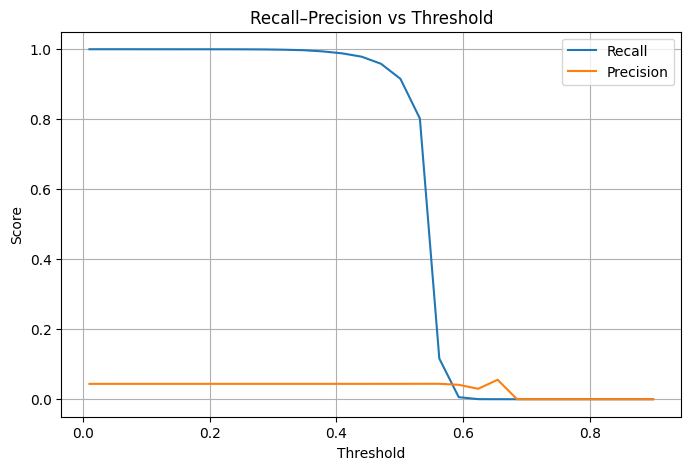

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(th_df["threshold"], th_df["recall"], label="Recall")
plt.plot(th_df["threshold"], th_df["precision"], label="Precision")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall–Precision vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


#### Recall–Precision vs Threshold Curve
##### This visualization shows how recall and precision trade off as the decision threshold changes. In fraud detection, lowering the threshold increases recall (catching more frauds) but significantly reduces precision, leading to many false positives. This plot justifies why threshold selection is a business decision, not a default 0.5 probability cutoff. It also explains why accuracy alone is misleading for highly imbalanced datasets

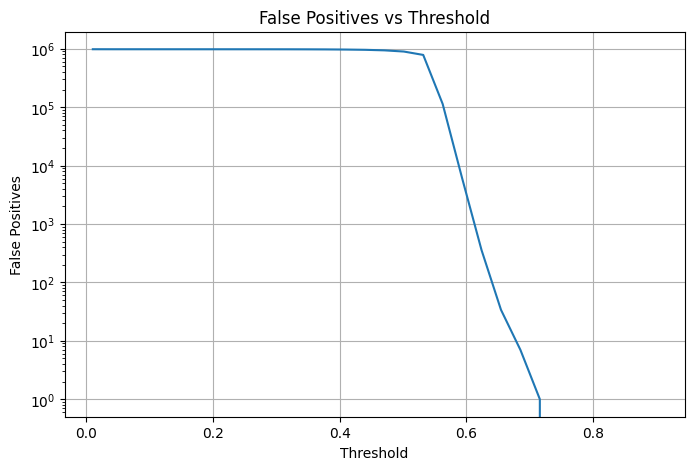

In [113]:
plt.figure(figsize=(8,5))
plt.plot(th_df["threshold"], th_df["fp"])
plt.xlabel("Threshold")
plt.ylabel("False Positives")
plt.title("False Positives vs Threshold")
plt.yscale("log")  # IMPORTANT: scale for visibility
plt.grid(True)
plt.show()


#### False Positives vs Threshold (Operational Impact)
##### This plot visualizes the number of false positives generated at different thresholds, which directly translates to customer friction and operational cost in real banking systems. The log scale highlights how false positives drop exponentially as the threshold increases. This visualization is critical to demonstrate that low thresholds are not viable in production, even if recall is high.

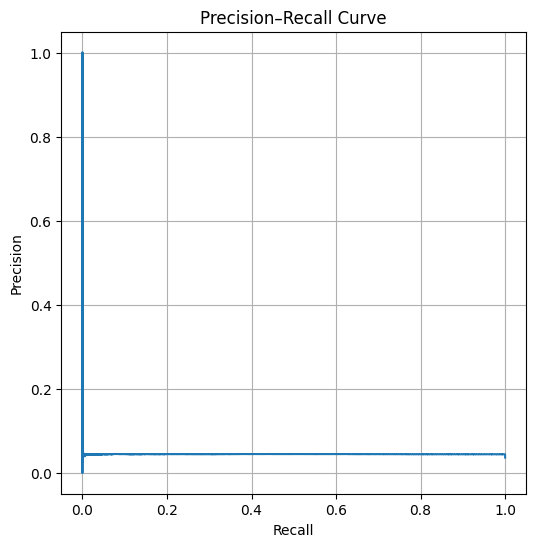

In [114]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True)
plt.show()


#### Precision–Recall Curve (Fraud-Specific Performance)
##### The Precision–Recall curve is more informative than ROC for rare-event problems like fraud detection. It shows how precision decreases as recall increases, highlighting the difficulty of maintaining high precision when fraud prevalence is very low. This curve validates whether the model is usable in real-world fraud systems where false positives are costly.

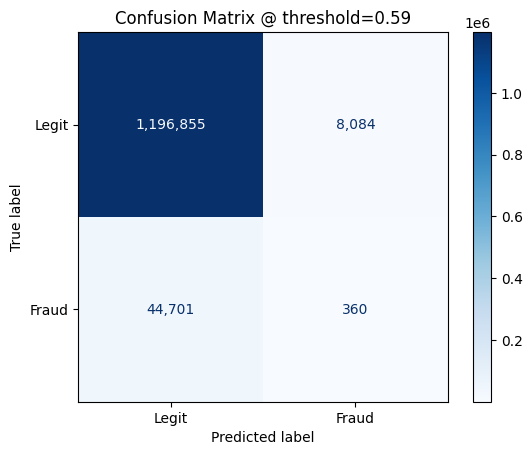

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

BUSINESS_THRESHOLD = 0.59
y_pred_bt = (y_prob >= BUSINESS_THRESHOLD).astype(int)

cm = confusion_matrix(y_test, y_pred_bt)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Legit", "Fraud"]
)
disp.plot(cmap="Blues", values_format=",")
plt.title(f"Confusion Matrix @ threshold={BUSINESS_THRESHOLD}")
plt.show()


#### Confusion Matrix at Business Threshold
##### This confusion matrix represents the real operational outcome at a chosen business threshold. It clearly shows how many frauds are correctly detected versus how many legitimate transactions are incorrectly flagged. This visualization bridges the gap between machine learning metrics and business decision-making, making model performance understandable to non-technical stakeholders.

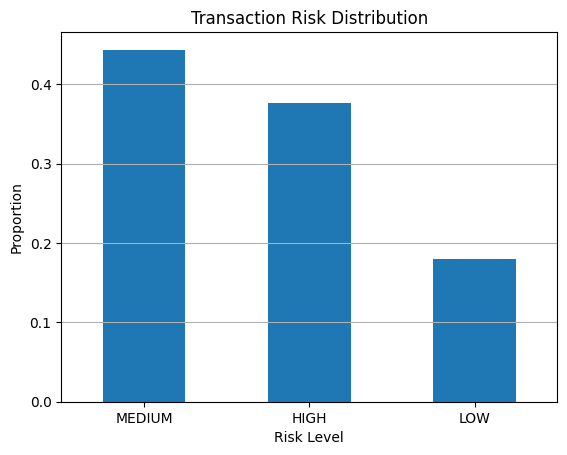

In [116]:
risk_counts = test_df["risk_level"].value_counts(normalize=True)

risk_counts.plot(
    kind="bar",
    title="Transaction Risk Distribution",
    ylabel="Proportion",
    xlabel="Risk Level",
    rot=0
)
plt.grid(axis="y")
plt.show()


#### Transaction Risk Tier Distribution
##### This bar chart categorizes transactions into Low, Medium, and High risk tiers, reflecting how a production fraud system operates. Instead of blocking everything, banks use risk tiers to trigger different actions such as monitoring, OTP verification, or manual review. This visualization demonstrates that the model is deployment-ready and aligned with real banking workflows.